

# 张量（Tensors）

在深度学习里，Tensor实际上就是一个多维数组（multidimensional array），而Tensor的目的是能够创造更高维度的矩阵、向量。张量与标量和矢量一样，是可以用来描述物理特性的简单数学对象。事实上，张量只是标量和矢量的概括；标量是零阶张量，而矢量是一阶张量。张量的阶（或秩）由描述张量所需的方向数（以及数组的维数）定义。
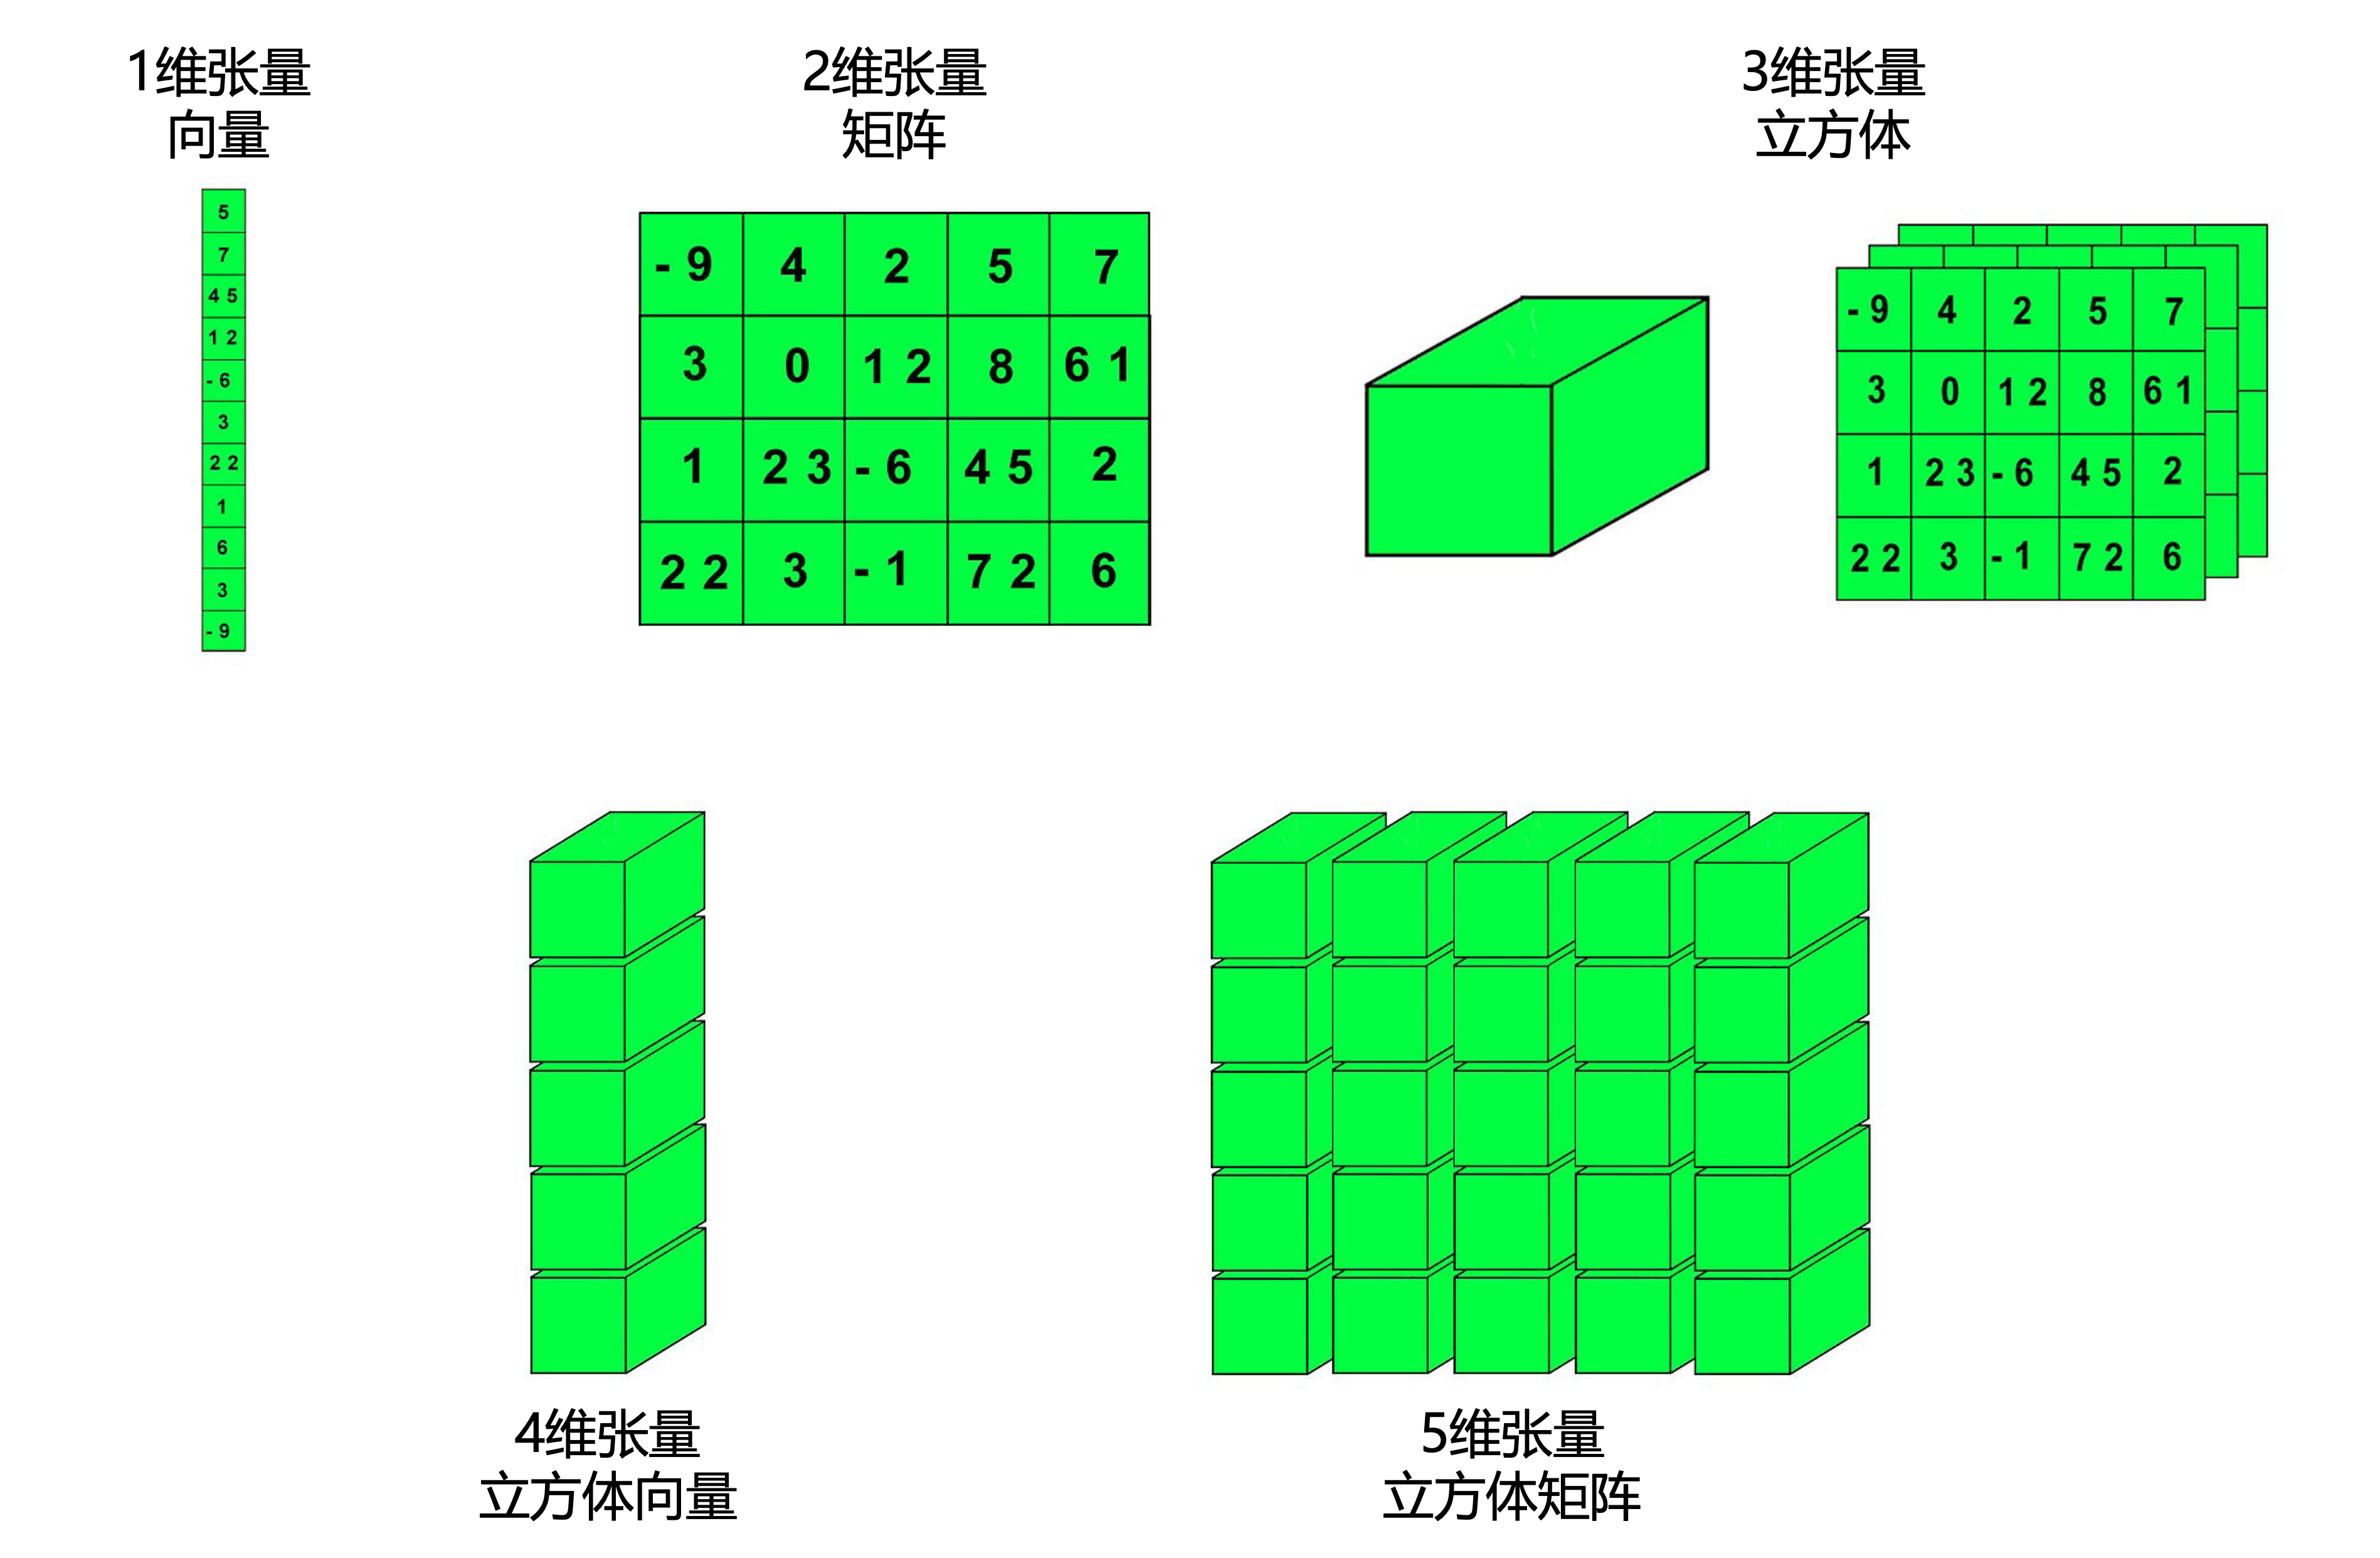


在PyTorch中，张量是一种专用的数据结构，非常类似于数组和矩阵。在PyTorch中使用张量来编码模型的输入和输出，以及模型的参数。
张量类似于 [NumPy的](https://numpy.org/) ndarrays，只是张量可以在 GPUs 或其他硬件加速器上运行。

In [1]:
import torch
import numpy as np

## 初始化一个张量

张量可以通过多种方式初始化，比如下面一些例子:

**将数据直接转换为张量：**

我们可以直接将数据转换为张量，数据的类型将自动识别。



In [2]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)

**从NumPy数组中转换：**


In [3]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

**通过其他张量得到:**

新的张量保留了原来张量的属性（shape, datatype，device）等，除非自己重新定义属性。



In [4]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.9249, 0.0914],
        [0.3648, 0.3001]]) 



**用随机值或常量定义:**

``shape`` 是张量维度的元组。在下面的函数中，定义了输出张量的维度。

In [5]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.6097, 0.7780, 0.2610],
        [0.4096, 0.9404, 0.4220]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


--------------




## 张量的属性

张量的属性描述了它的形状、数据类型和存储的位置。



In [6]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


--------------




## 张量运算

[这里](https://pytorch.org/docs/stable/torch.html)全面介绍了 100 多种张量运算，包括算术运算、线性代数、矩阵操作（转置、索引、切片）、采样等。

这些操作都可以在 GPU 上运行（速度通常高于 CPU）。
默认情况下，张量是在 CPU 上创建的。我们需要使用``.to``方法（在检查 GPU 是否可用后）明确地将张量移动到 GPU 上。需要注意的是，跨设备复制大型张量可能会耗费大量时间和内存。



In [7]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
    tensor = tensor.to("cuda")

如果你熟悉 NumPy API，你会发现 Tensor API 的使用也差不多。

**标准numpy风格的矩阵切片和索引:**

In [8]:
tensor = torch.ones(4, 4)
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}")
tensor[:,1] = 0
print(tensor)

First row: tensor([1., 1., 1., 1.])
First column: tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


**矩阵拼接**

可以使用``torch.cat``在某个维度上拼接一个序列的张量。类似但稍微不同的还有[torch.stack](https://pytorch.org/docs/stable/generated/torch.stack.html)




In [9]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


**算术运算**


In [10]:
# 这里实现了两个张量的矩阵乘法. y1, y2, y3 会有相同的值
# ``tensor.T`` 返回一个矩阵的转置
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(y1)
torch.matmul(tensor, tensor.T, out=y3)


# 元素积的计算. z1, z2, z3 会有相同的值
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


**单元素张量** 
如果有一个单元素张量，例如将所有的张量的值聚合成一个值，就可以使用 ``item()` 将其转换为 Python数值：


In [11]:
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

12.0 <class 'float'>



**原地操作**
将结果存储到操作数中的操作称为原地操作，通常用后缀 ``_`` 表示。
例如：``x.copy_(y)``, ``x.t_()``，将改变 ``x``自身。

In [12]:
print(f"{tensor} \n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])



### 注意

原地操作可以省一些内存，但是因为在计算导数时可能会出现问题，因此不太鼓励使用原地操作。

--------------





## 与Numpy的关系
CPU 上的张量和 NumPy 数组可以共享底层内存位置，改变其中一个也会改变另一个。




### Tensor to NumPy array



In [13]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]



张量的变化也会引起NumPy数组的变化。

In [14]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


### NumPy array to Tensor



In [15]:
n = np.ones(5)
t = torch.from_numpy(n)

NumPy数组的变化也会引起张量的变化。


In [16]:
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]
